In [1]:
!pip3 install missingno
import os
import numpy as np
import pandas as pd
import missingno as msn
from scipy import stats
from scipy.stats import norm

pd.options.mode.chained_assignment = None

In [2]:
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
sns.set()
style.use('fivethirtyeight')

In [3]:
from sklearn import metrics
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [4]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [6]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Indicator(
                mode = "number",
                value = data.shape[0],
                number={'font':{'color': '#7b68ee', 'size':100}},
                delta = {"reference": 600},
                title = {"text": "Rows 🗒 <br><span style="
                                 "'font-size:0.7em;color:gray'>in the data</span>"},
                domain = {'y': [0.7, 1], 'x': [0, 0.5]}))

fig.add_trace(go.Indicator(
                mode = "number",
                value = data.shape[1],
                number={'font':{'color': '#7b68ee', 'size':100}},
                delta = {"reference": 600, "valueformat": ".0f"},
                title = {"text": "Columns 🏛 <br><span style="
                                 "'font-size:0.7em;color:gray'>in the data</span>"},
                domain = {'y': [0, 0.3], 'x': [0.5, 1]}))
fig.show()

### It’s worth noting that we don’t have much data

In [8]:
data.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [10]:
data.status.unique()

array(['Placed', 'Not Placed'], dtype=object)

In [11]:
hfont = {'fontname':'serif', 'weight': 'bold'}
two_colors = ['#dd38ff', '#5727ed']
five_colors = ['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE']

In [12]:
mis_val_colors = []

for col in data.columns:
    if data[col].isna().sum() != 0:
        mis_val_colors.append('#fe1969')
    else:
        mis_val_colors.append('gray')

Text(0.5, 1.15, 'Missing values (before)')

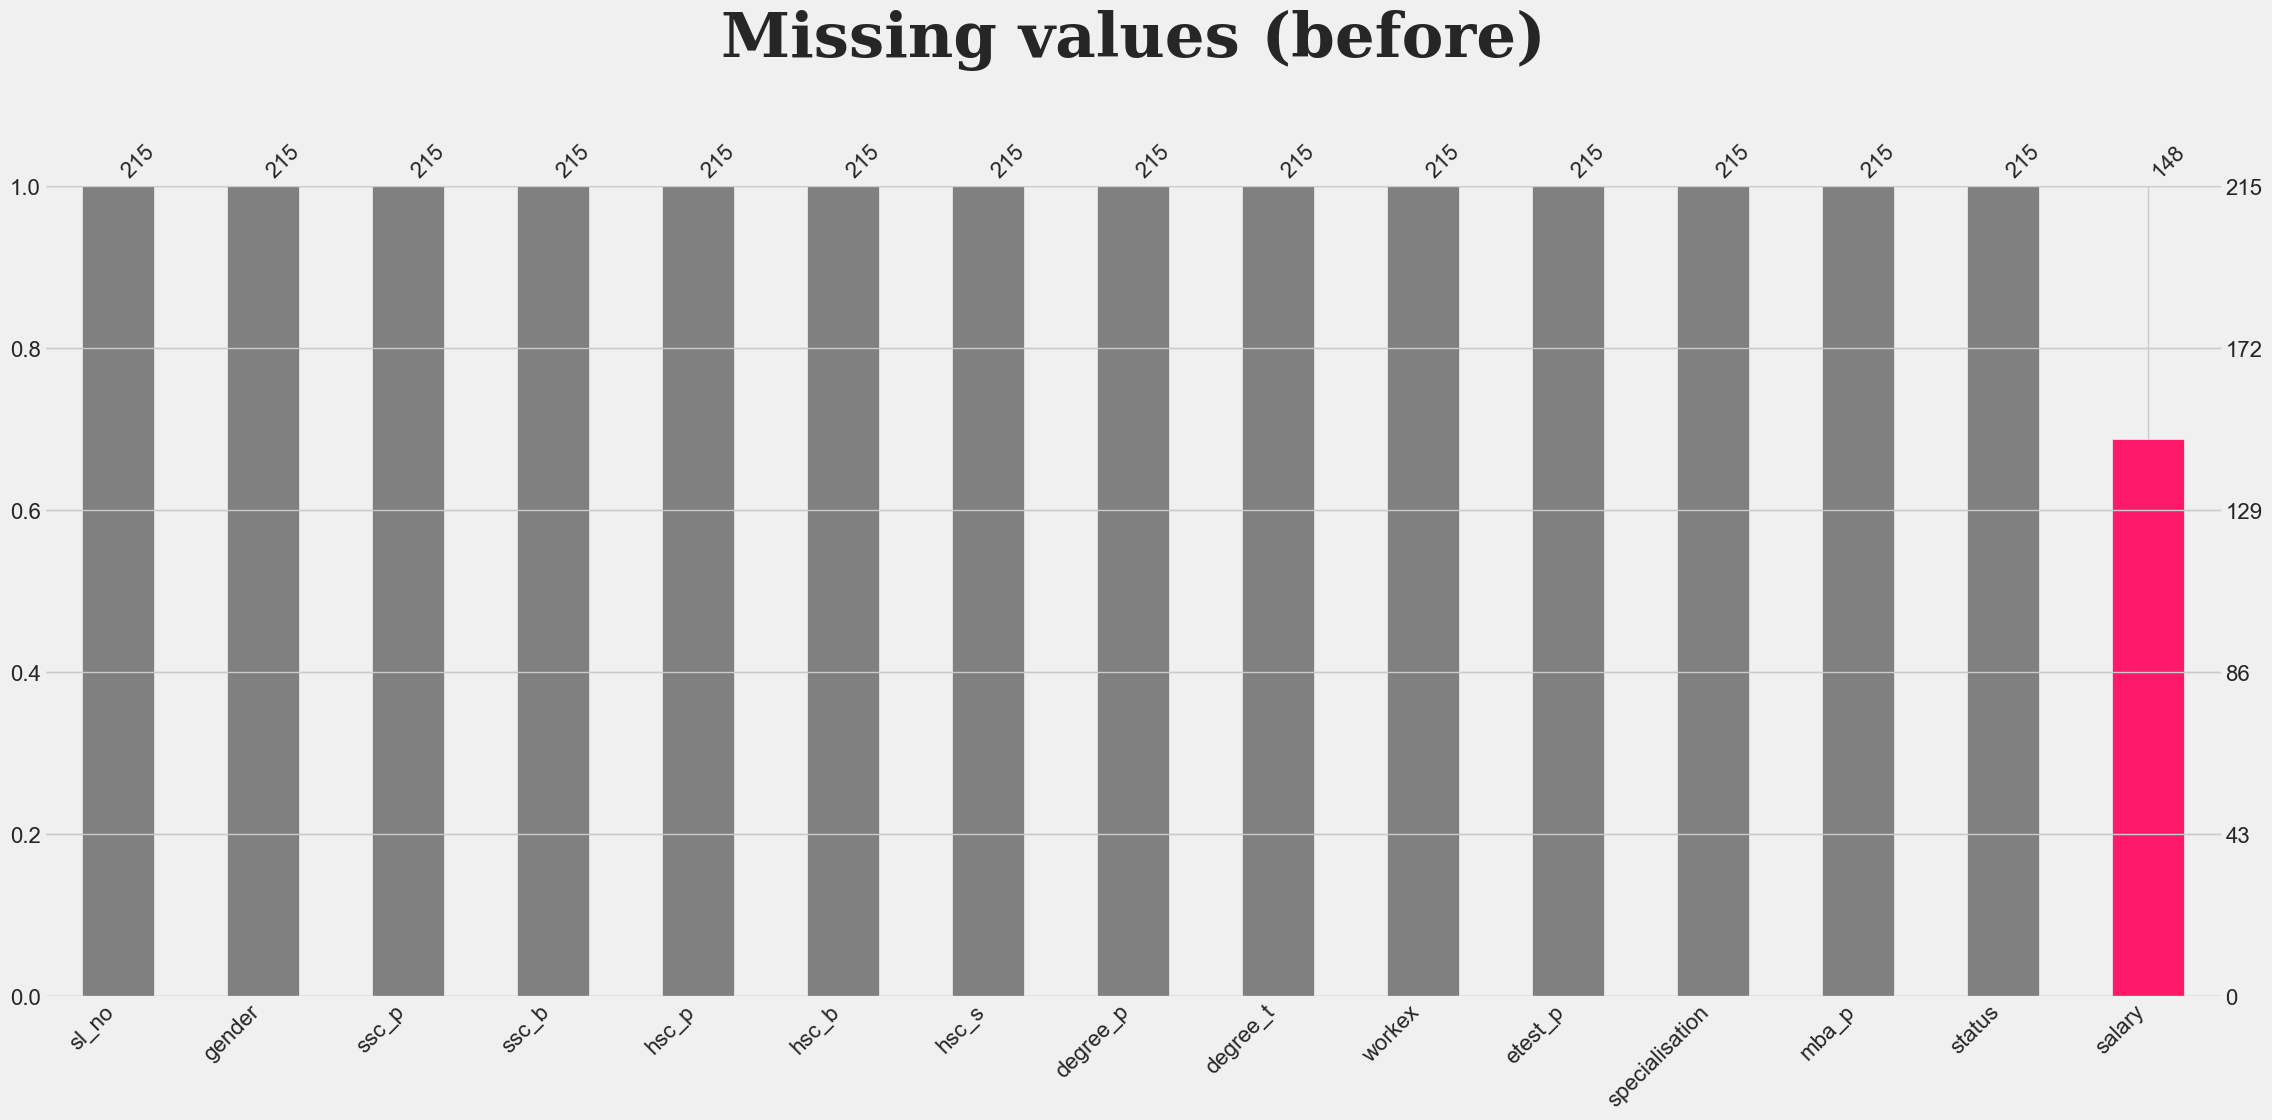

In [13]:
msn.bar(data, color=mis_val_colors)
plt.title('Missing values (before)', size=45, y=1.15, **hfont)

This dataset has some missing values for salary column

Text(0, 0.5, 'Density')

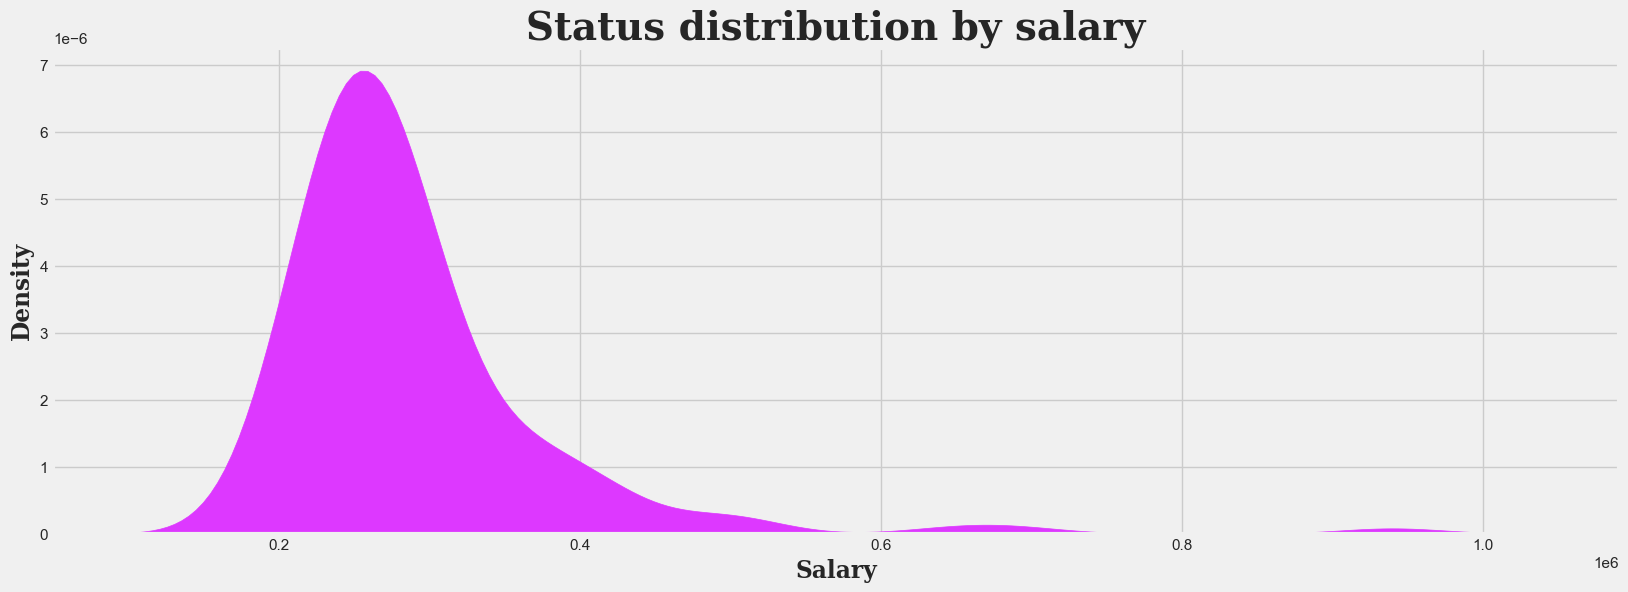

In [14]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Status distribution by salary', size=28, **hfont)

# Data without NaN values in salary column
temp_data = data.copy()
temp_data = temp_data.dropna()

# Main plots
sns.kdeplot(data=temp_data,x='salary', shade=True, ax=ax, color=two_colors[0], alpha=1)
plt.xlabel('Salary', **hfont)
plt.ylabel('Density', **hfont)

In [15]:
temp_data.salary.mode().iloc[0]

300000.0

In [16]:
data[['status', 'salary']][np.isnan(data.salary)]

,status,salary
3,Not Placed,NaN
5,Not Placed,NaN
6,Not Placed,NaN
9,Not Placed,NaN
12,Not Placed,NaN
...,...,...
198,Not Placed,NaN
201,Not Placed,NaN
206,Not Placed,NaN
208,Not Placed,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


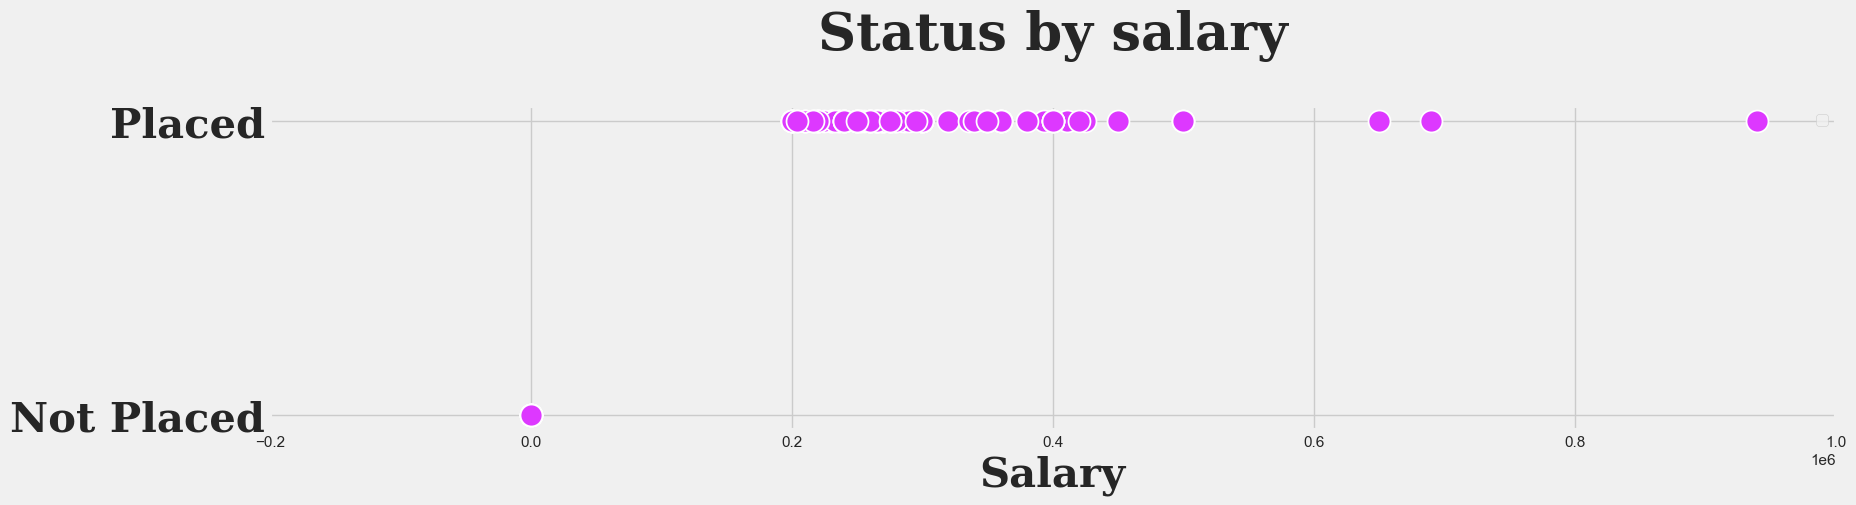

In [17]:
# Let's look at correlation b/w salary and status
data.salary.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize = (18, 4))

status_salary_plot = sns.scatterplot(x = 'salary', y = 'status', data = data,
                                     s=250, color=two_colors[0])

ax.xaxis.set_ticks(ax.get_xticks())
ax.yaxis.set_ticks(ax.get_yticks())

status_salary_plot.set_yticklabels(['Placed', 'Not Placed'], size=30, **hfont)
status_salary_plot.set(ylabel=None)

plt.title('Status by salary', size=38, y=1.15, **hfont)
plt.xlabel('Salary', size=30, **hfont)
plt.legend()

In [18]:
data = data.drop(columns=['salary'])

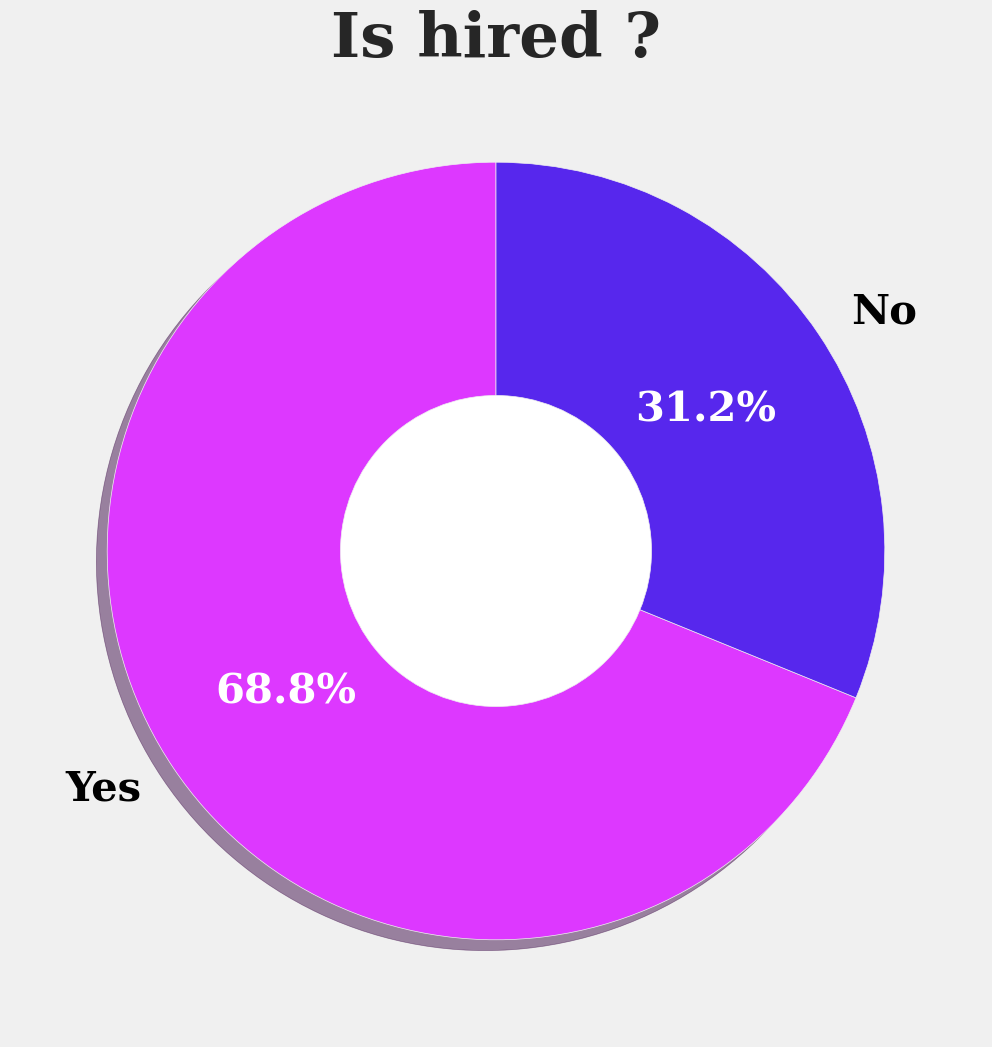

In [19]:
pie_colors = two_colors.copy()

pred_classes = data.status.value_counts()

plt.figure(figsize=(17, 12))
patches, texts, pcts = plt.pie(pred_classes,
                               labels=['Yes', 'No'],
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 30,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white', size=30)

plt.title('Is hired ?', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

### Conclusions on class ratios:
#### We have a **preponderance** of observations in one class. In our data, the number of students hired to work is much higher. Therefore, the use of the **Accuracy** metric may lead to sub-optimal results

In [20]:
data.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed


In [21]:
data.status = data.status.map({'Placed': 1, 'Not Placed': 0})

In [22]:
data.drop(columns=['sl_no'], inplace=True)

## Gender


---


Gender: Male='M',Female='F'

In [23]:
type(data.gender.iloc[0])

str

In [24]:
data.gender = data.gender.map({'M': 1, 'F': 0})

Text(0.5, 0, 'count')

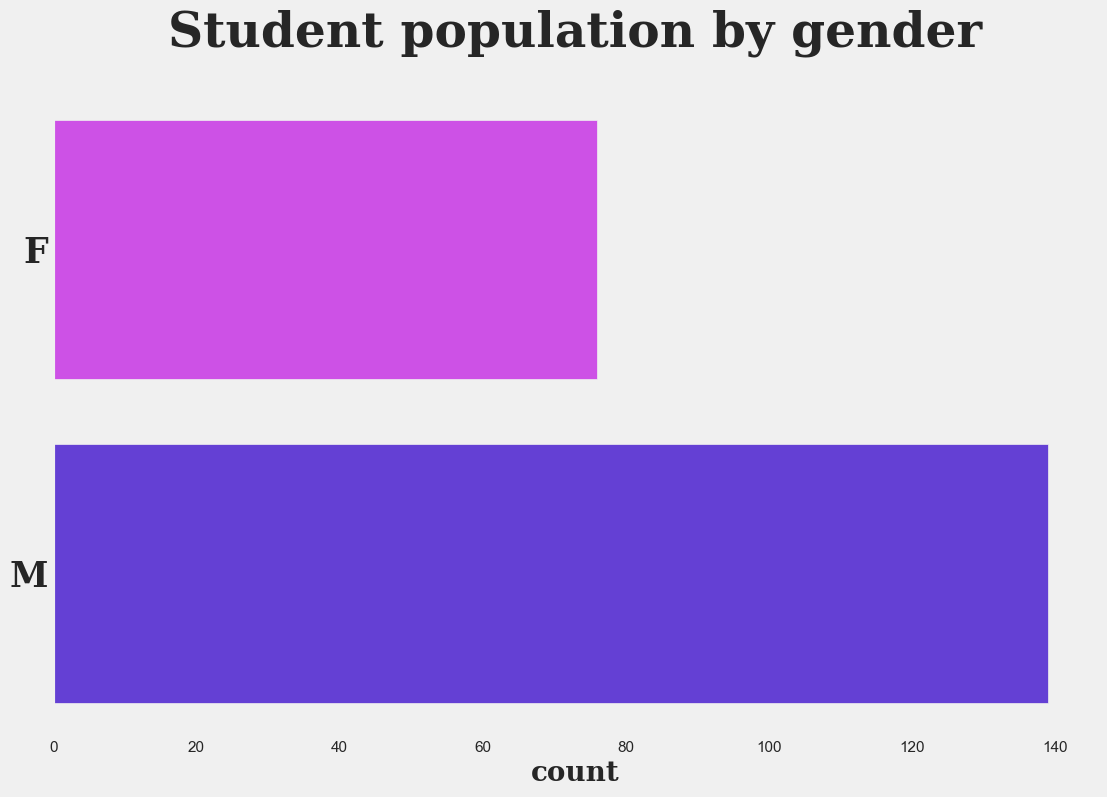

In [25]:
plt.figure(figsize=(12, 8))
gender_plot = sns.countplot(y=data.gender, palette=two_colors)
gender_plot.set_title('Student population by gender', fontsize=35, y=1.05, **hfont)
gender_plot.set(ylabel=None)
plt.grid(False)
gender_plot.set_yticklabels(['F', 'M'], size=25, **hfont)
gender_plot.set_xlabel('count', size=20, **hfont)

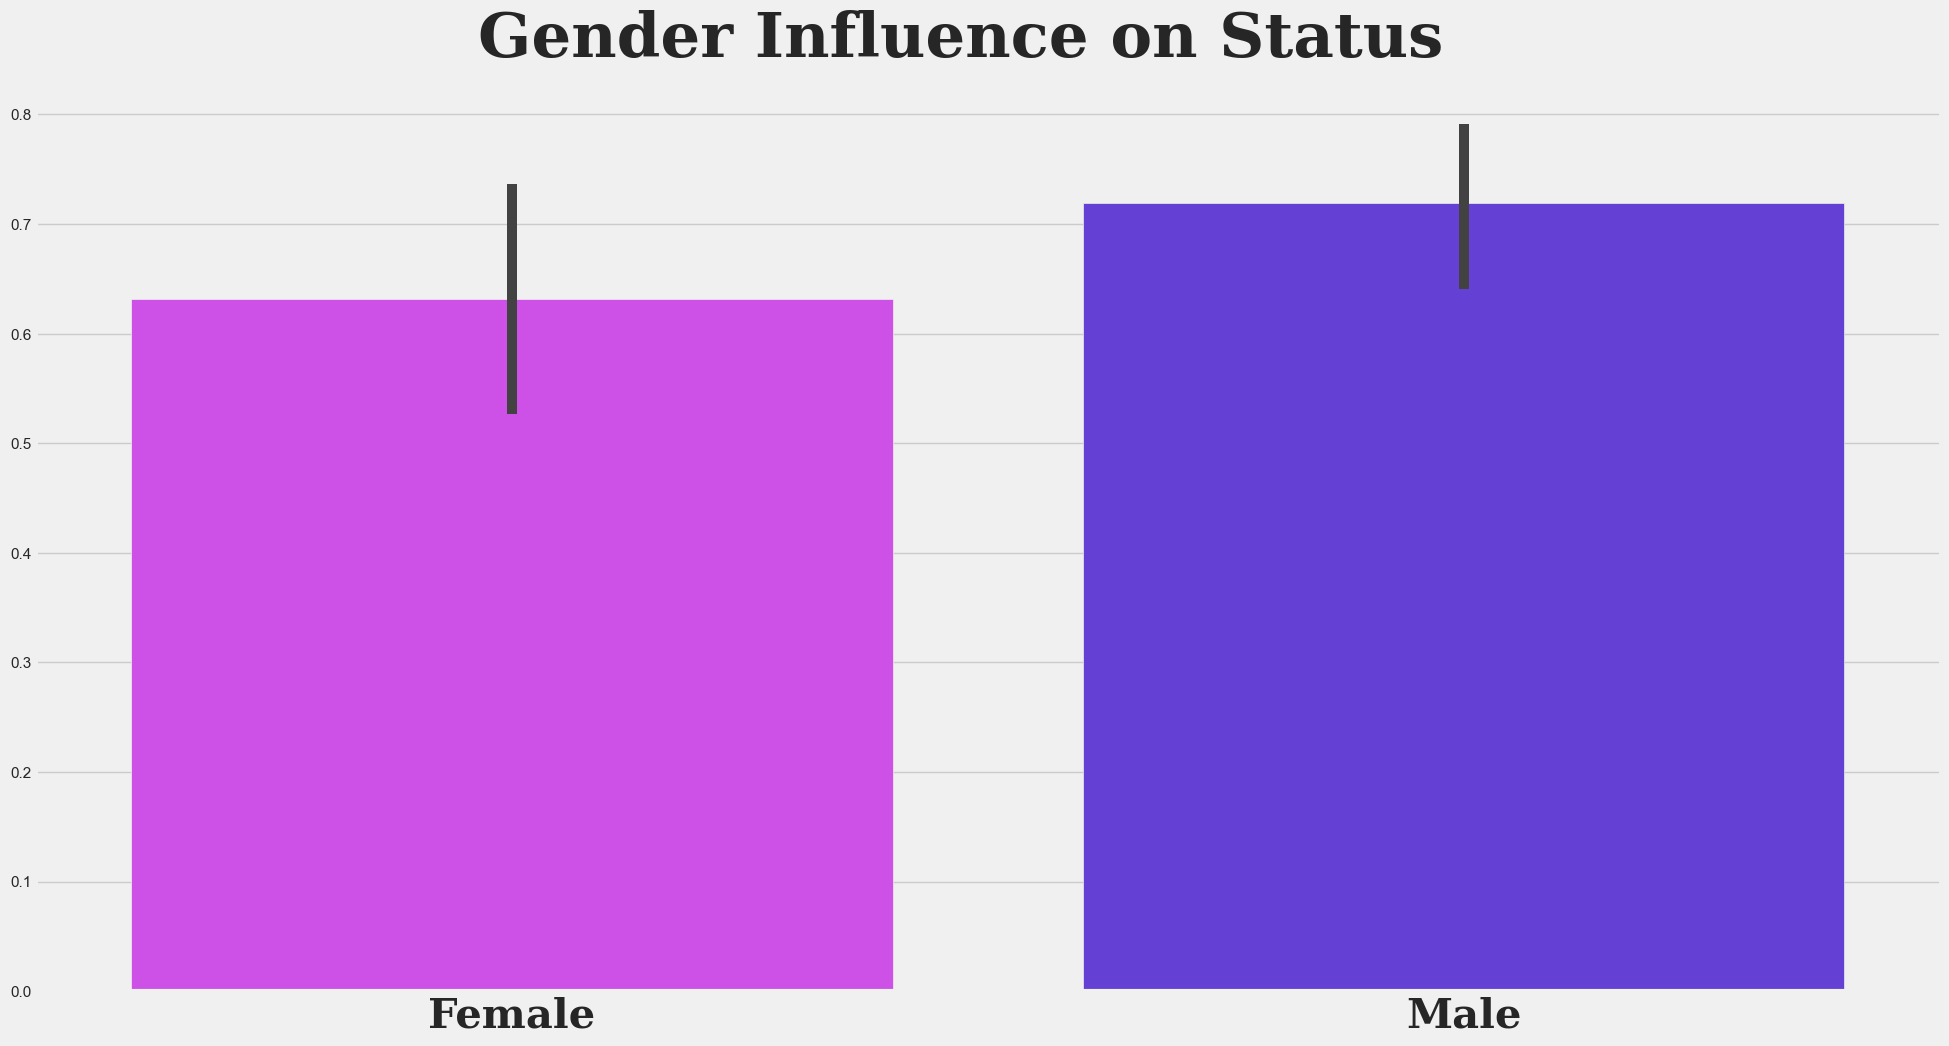

In [26]:
gender_plot = sns.catplot(y='status', x='gender', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors)
gender_plot.set_xticklabels(['Female', 'Male'], size=30, **hfont)
gender_plot.fig.suptitle('Gender Influence on Status',
                            size=45, y=1.05, **hfont)
gender_plot.set(xlabel=None, ylabel=None)

## SSC_P


---

Secondary Education percentage - 10th Grade

Text(0.5, 0, 'SSC_P')

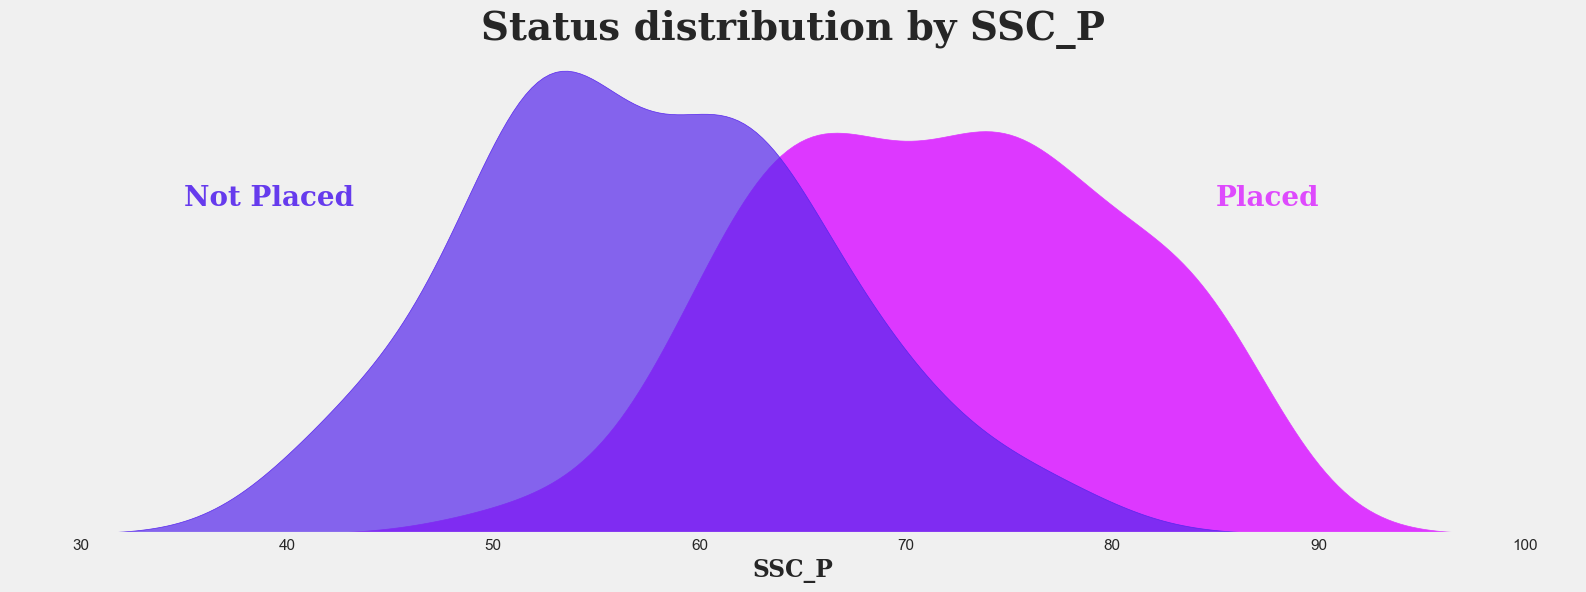

In [27]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Status distribution by SSC_P', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': two_colors[0]},
                             alpha=0.9)

ax.text(35, 0.03, 'Not Placed', {'fontproperties': 'Serif',
                                'size': '20',
                                'weight': 'bold',
                                'color': two_colors[1]}, alpha=0.9)

sns.kdeplot(data=data[data.status == 1],
            x='ssc_p', shade=True, ax=ax, color=two_colors[0], alpha=1)
sns.kdeplot(data=data[data.status == 0],
            x='ssc_p', shade=True, ax=ax, color=two_colors[1], alpha=0.7)
plt.xlabel('SSC_P', **hfont)

### Let's find out how different this groups via **statistical tests**

In [28]:
placed_group = data[data.status == 1]['ssc_p']
not_placed_group = data[data.status == 0]['ssc_p']

t_test = stats.ttest_ind(placed_group, not_placed_group)
u_test = stats.mannwhitneyu(placed_group, not_placed_group)

In [29]:
print(f'Results of T-test                :   {t_test.pvalue}')
print(f'Results of U-test (Mann-whitneyu):   {u_test.pvalue}')

Results of T-test                :   4.115201043884403e-23
Results of U-test (Mann-whitneyu):   1.692865445594402e-18


### **Conclusion:** 
- Visually looks like on average, the higher a 10th grade, the higher the chance to get a job
- We also ran tests and found statistically significant differences between groups

## SSC_B:


---


Board of Education: Central / Others (10th)

In [30]:
data.ssc_b.value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [31]:
data.ssc_b = data.ssc_b.map({'Central': 1, 'Others': 0})

[Text(0, 0, 'Others'), Text(1, 0, 'Central')]

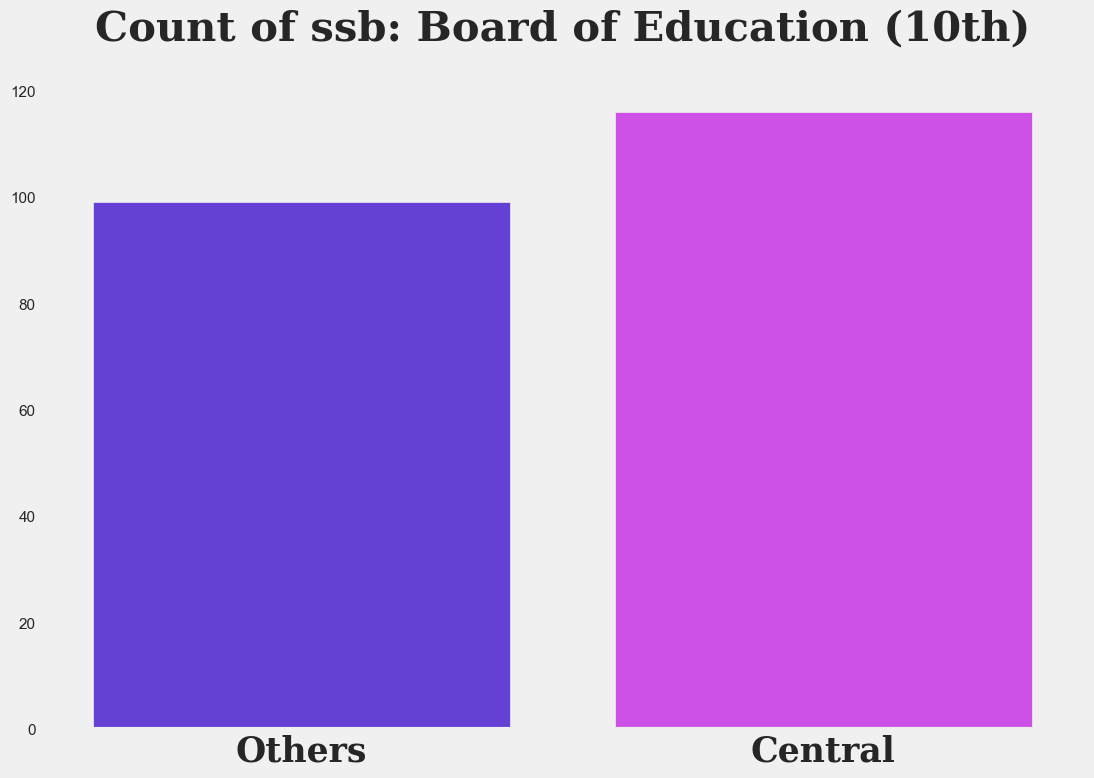

In [32]:
plt.figure(figsize=(12, 8))
ssc_b_plot = sns.countplot(x=data.ssc_b,
                            palette=two_colors[::-1])
ssc_b_plot.set_title('Count of ssb: Board of Education (10th)',
                      fontsize=30, y=1.05, **hfont)
ssc_b_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
ssc_b_plot.set_xticklabels(['Others', 'Central'], size=25, **hfont)

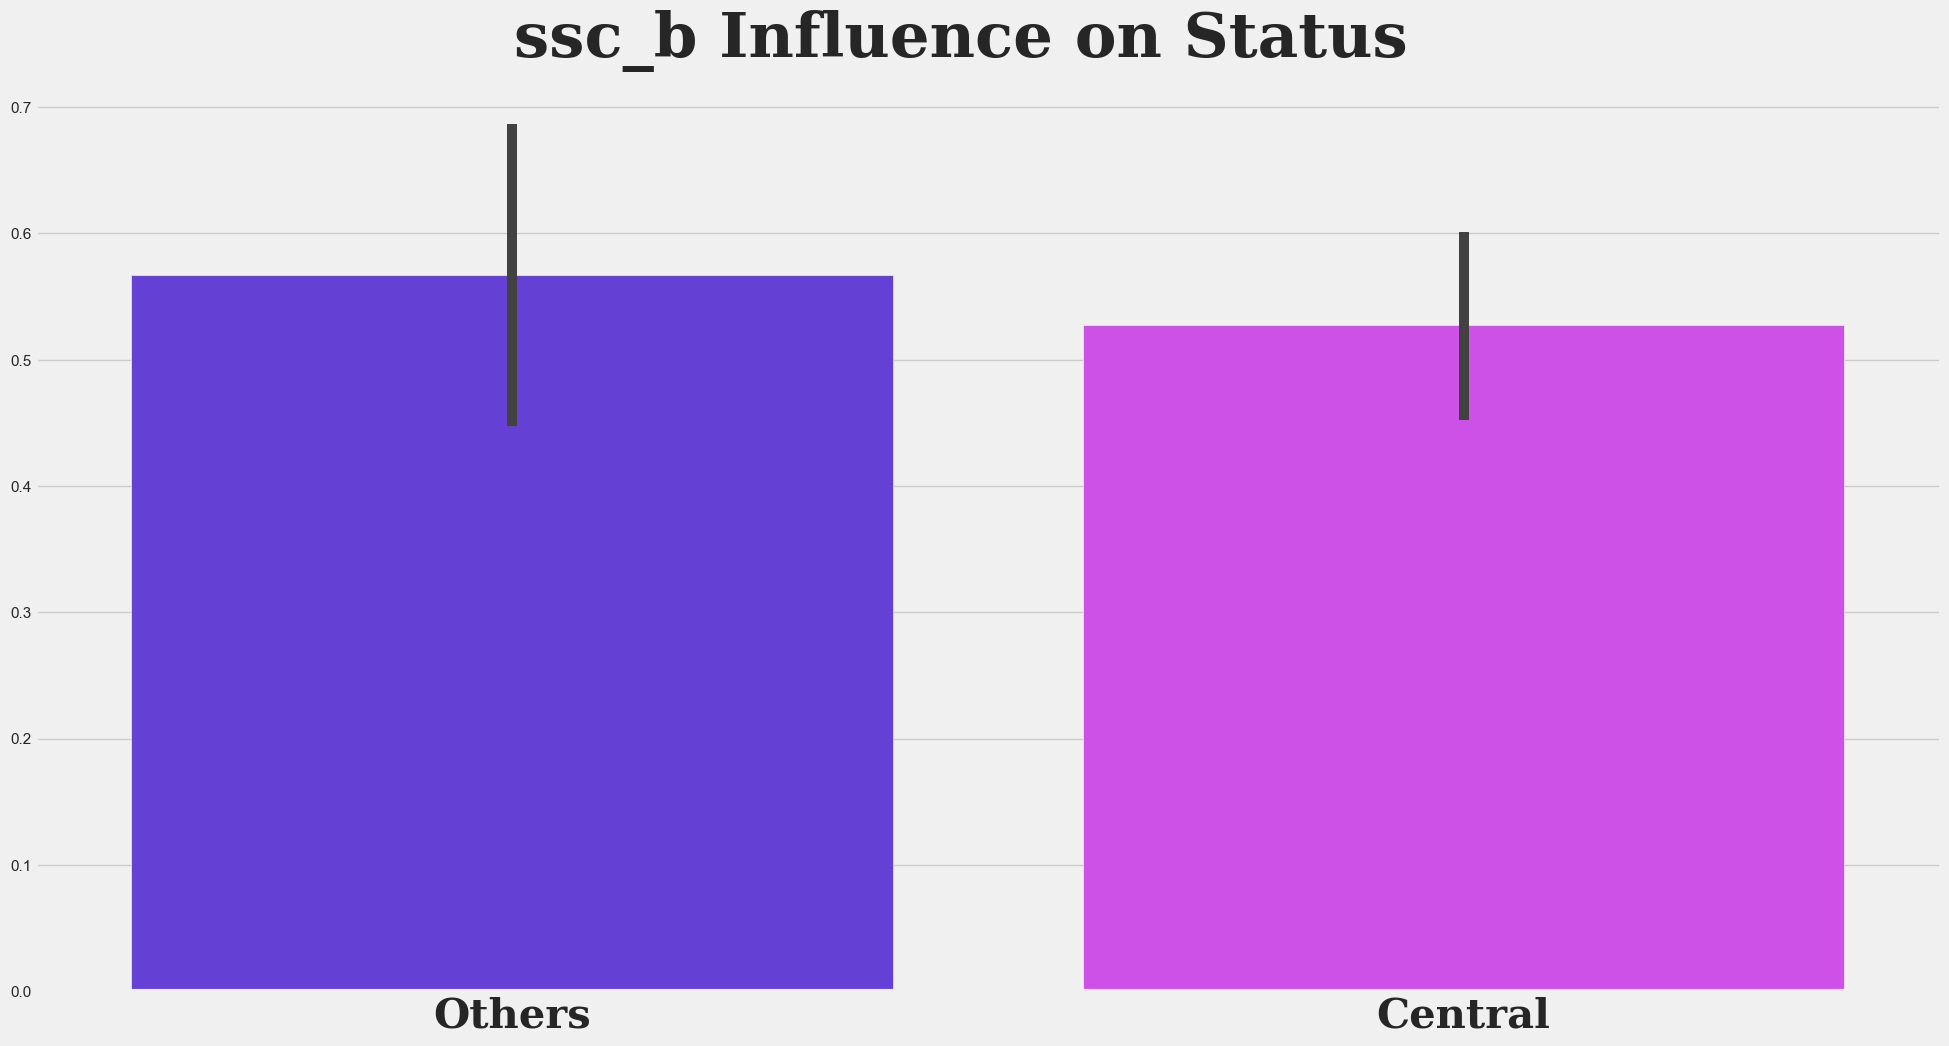

In [33]:
ssc_b_plot = sns.catplot(x='status', y='ssc_b', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
ssc_b_plot.set_xticklabels(['Others', 'Central'], size=30, **hfont)
ssc_b_plot.fig.suptitle('ssc_b Influence on Status',
                            size=45, y=1.05, **hfont)
ssc_b_plot.set(xlabel=None, ylabel=None)

## HSC_P


---

Higher Secondary Education percentage- 12th Grade

Placed mean:       69.92655405405404
Not Placed mean:   58.39552238805968


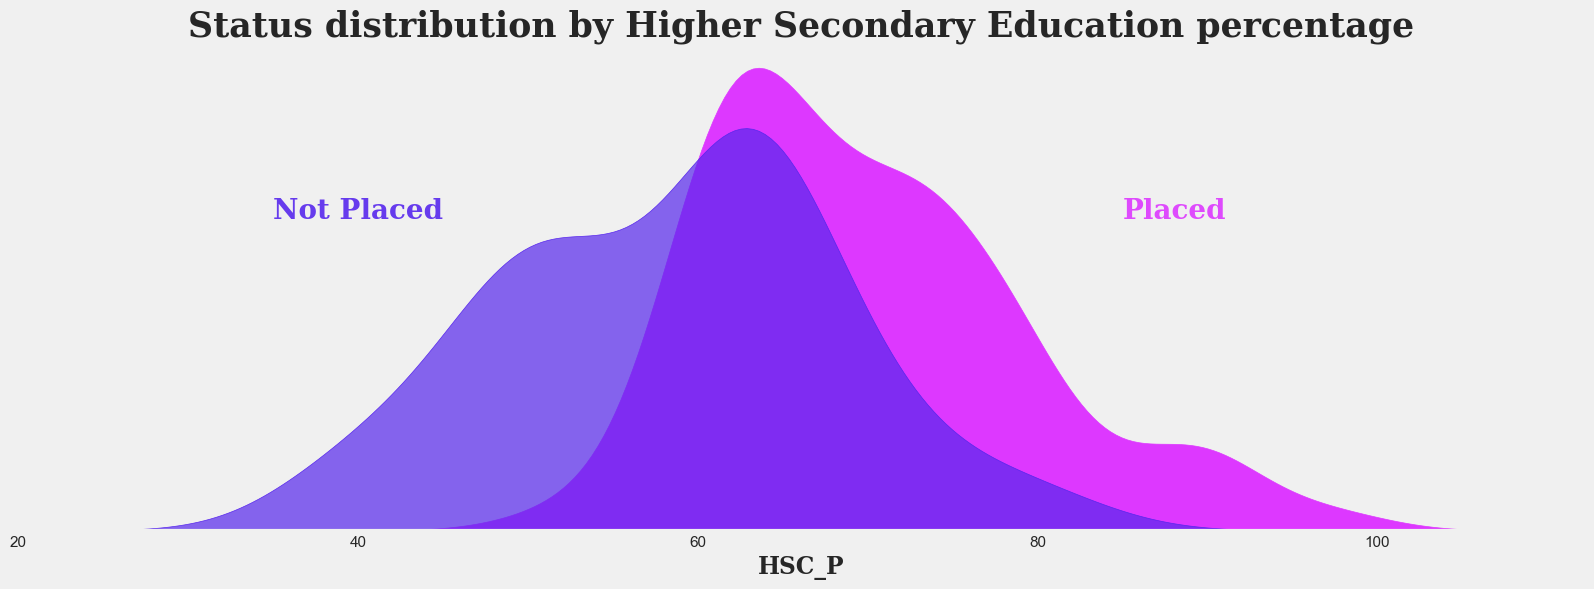

In [34]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Status distribution by Higher Secondary Education percentage', size=25, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': two_colors[0]}, alpha=0.9)

ax.text(35, 0.03, 'Not Placed', {'fontproperties': 'Serif',
                                'size': '20',
                                'weight': 'bold',
                                'color': two_colors[1]}, alpha=0.9)

sns.kdeplot(data=data[data.status == 1],
            x='hsc_p', shade=True, ax=ax, color=two_colors[0], alpha=1)
sns.kdeplot(data=data[data.status == 0],
            x='hsc_p', shade=True, ax=ax, color=two_colors[1], alpha=0.7)
plt.xlabel('HSC_P', **hfont)

print(f'Placed mean:       {data[data.status == 1]["hsc_p"].mean()}')
print(f'Not Placed mean:   {data[data.status == 0]["hsc_p"].mean()}')

## HSC_B:


---


Board of Education: Central / Others (12th)

In [35]:
data.hsc_b = data.hsc_b.map({'Central': 1, 'Others': 0})

[Text(0, 0, 'Others'), Text(1, 0, 'Central')]

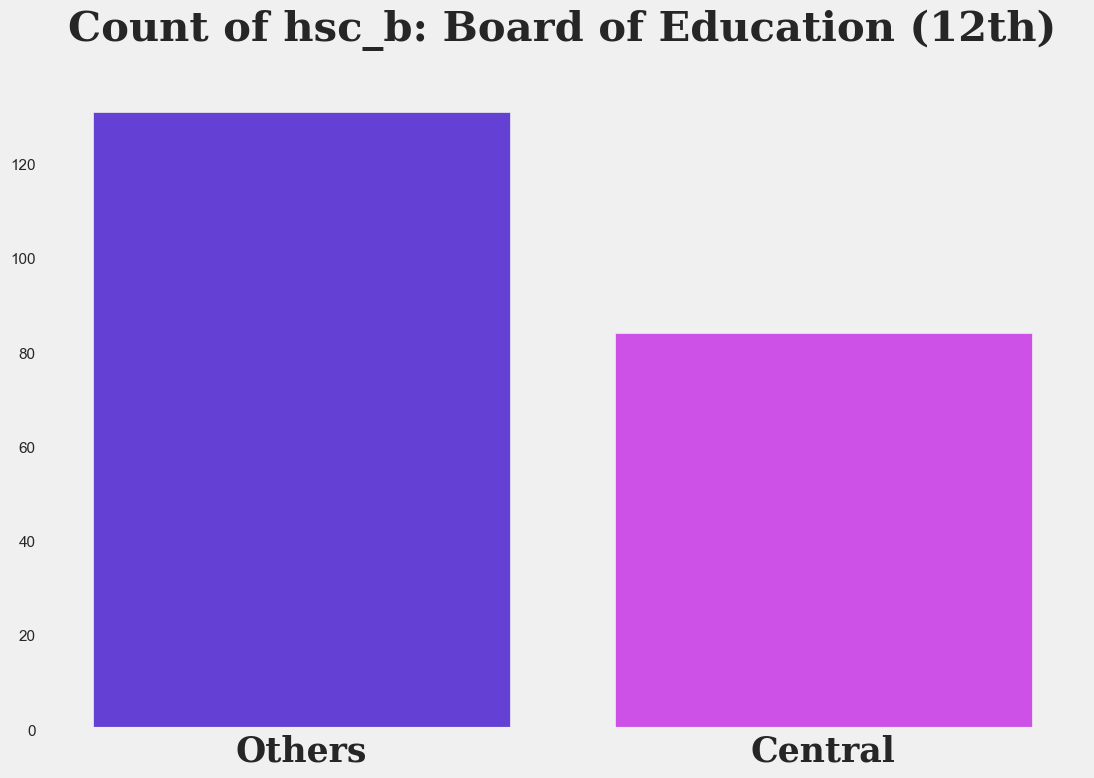

In [36]:
plt.figure(figsize=(12, 8))
ssc_b_plot = sns.countplot(x=data.hsc_b,
                            palette=two_colors[::-1])
ssc_b_plot.set_title('Count of hsc_b: Board of Education (12th)',
                      fontsize=30, y=1.05, **hfont)
ssc_b_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
ssc_b_plot.set_xticklabels(['Others', 'Central'], size=25, **hfont)

### **Conclusion:** There are not many students who have completed the 12th grade in central schools

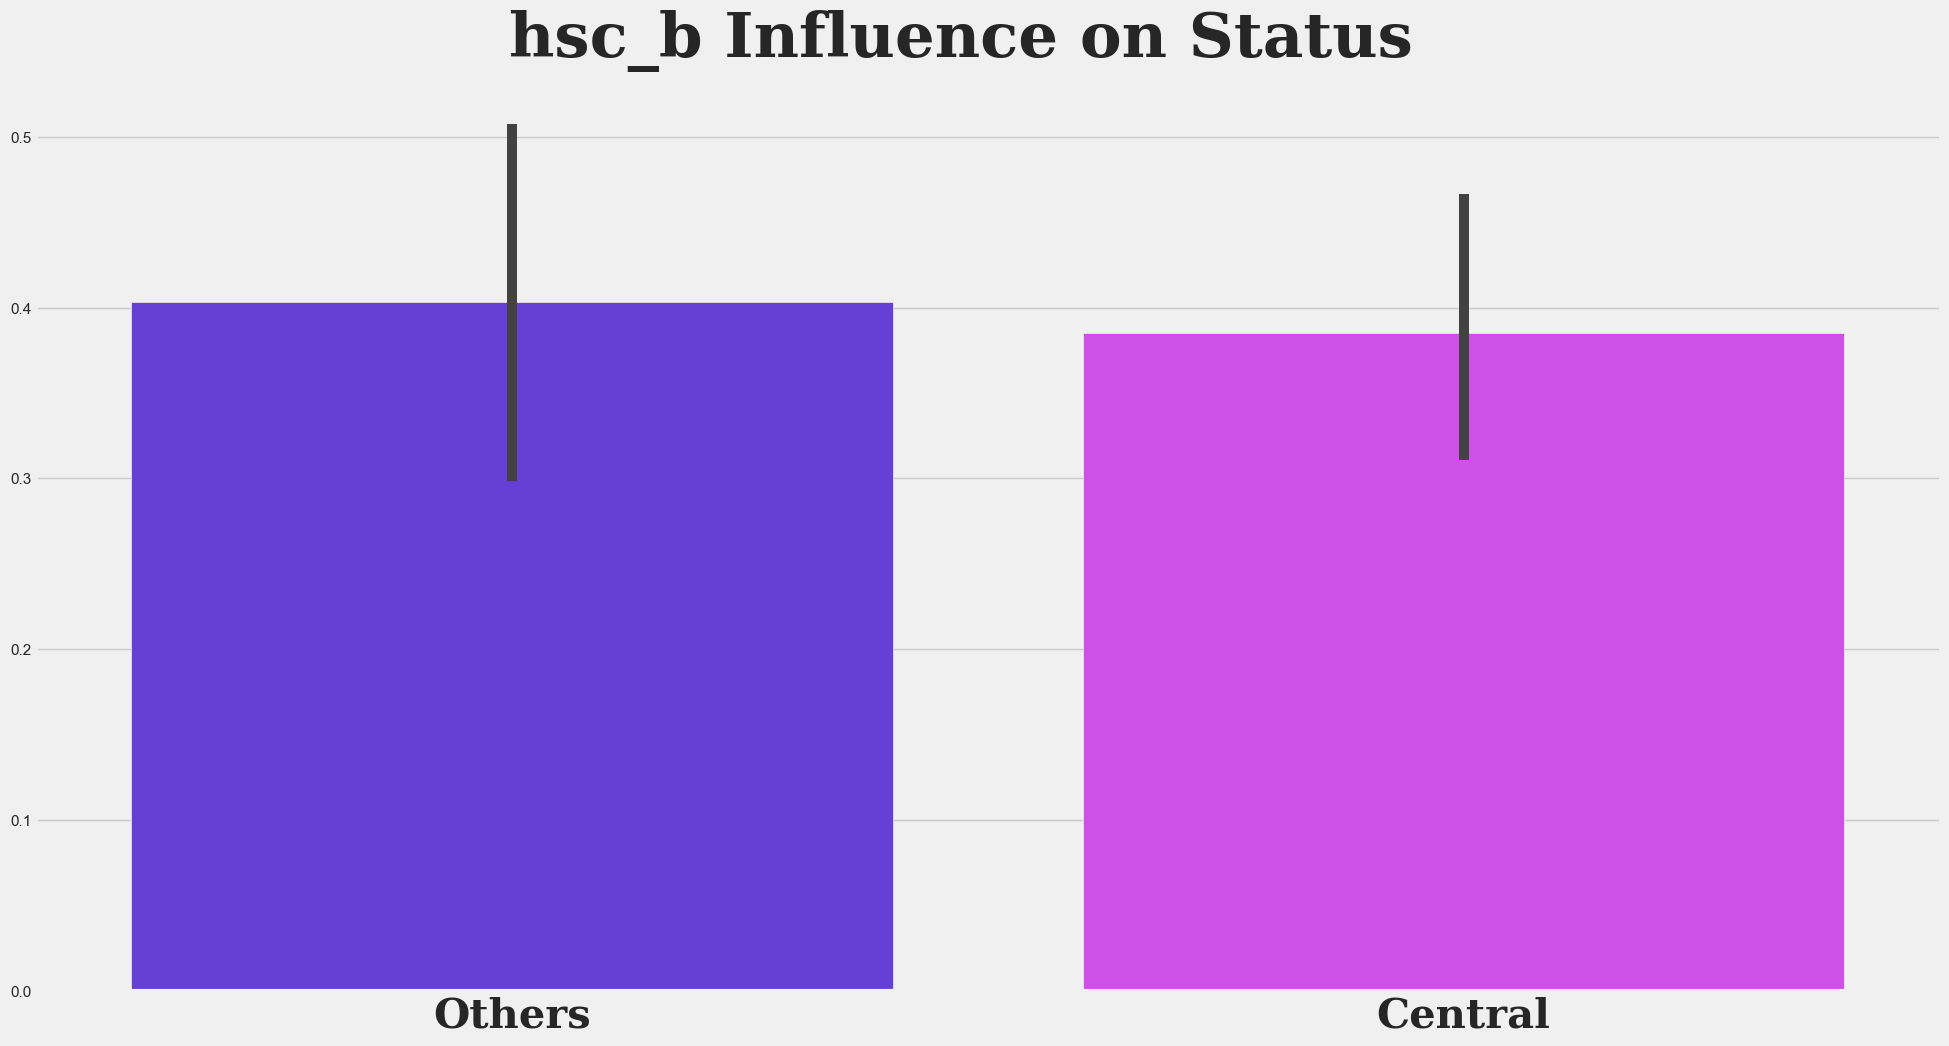

In [37]:
hsc_b_plot = sns.catplot(x='status', y='hsc_b', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
hsc_b_plot.set_xticklabels(['Others', 'Central'], size=30, **hfont)
hsc_b_plot.fig.suptitle('hsc_b Influence on Status',
                            size=45, y=1.05, **hfont)
hsc_b_plot.set(xlabel=None, ylabel=None)

## HSC_S:


---


Specialization in Higher Secondary Education

In [38]:
data.hsc_s = data.hsc_s.map({'Commerce': 2, 'Science': 1, 'Arts': 0}) 

[Text(0, 0, ''), Text(1, 0, ''), Text(2, 0, '')]

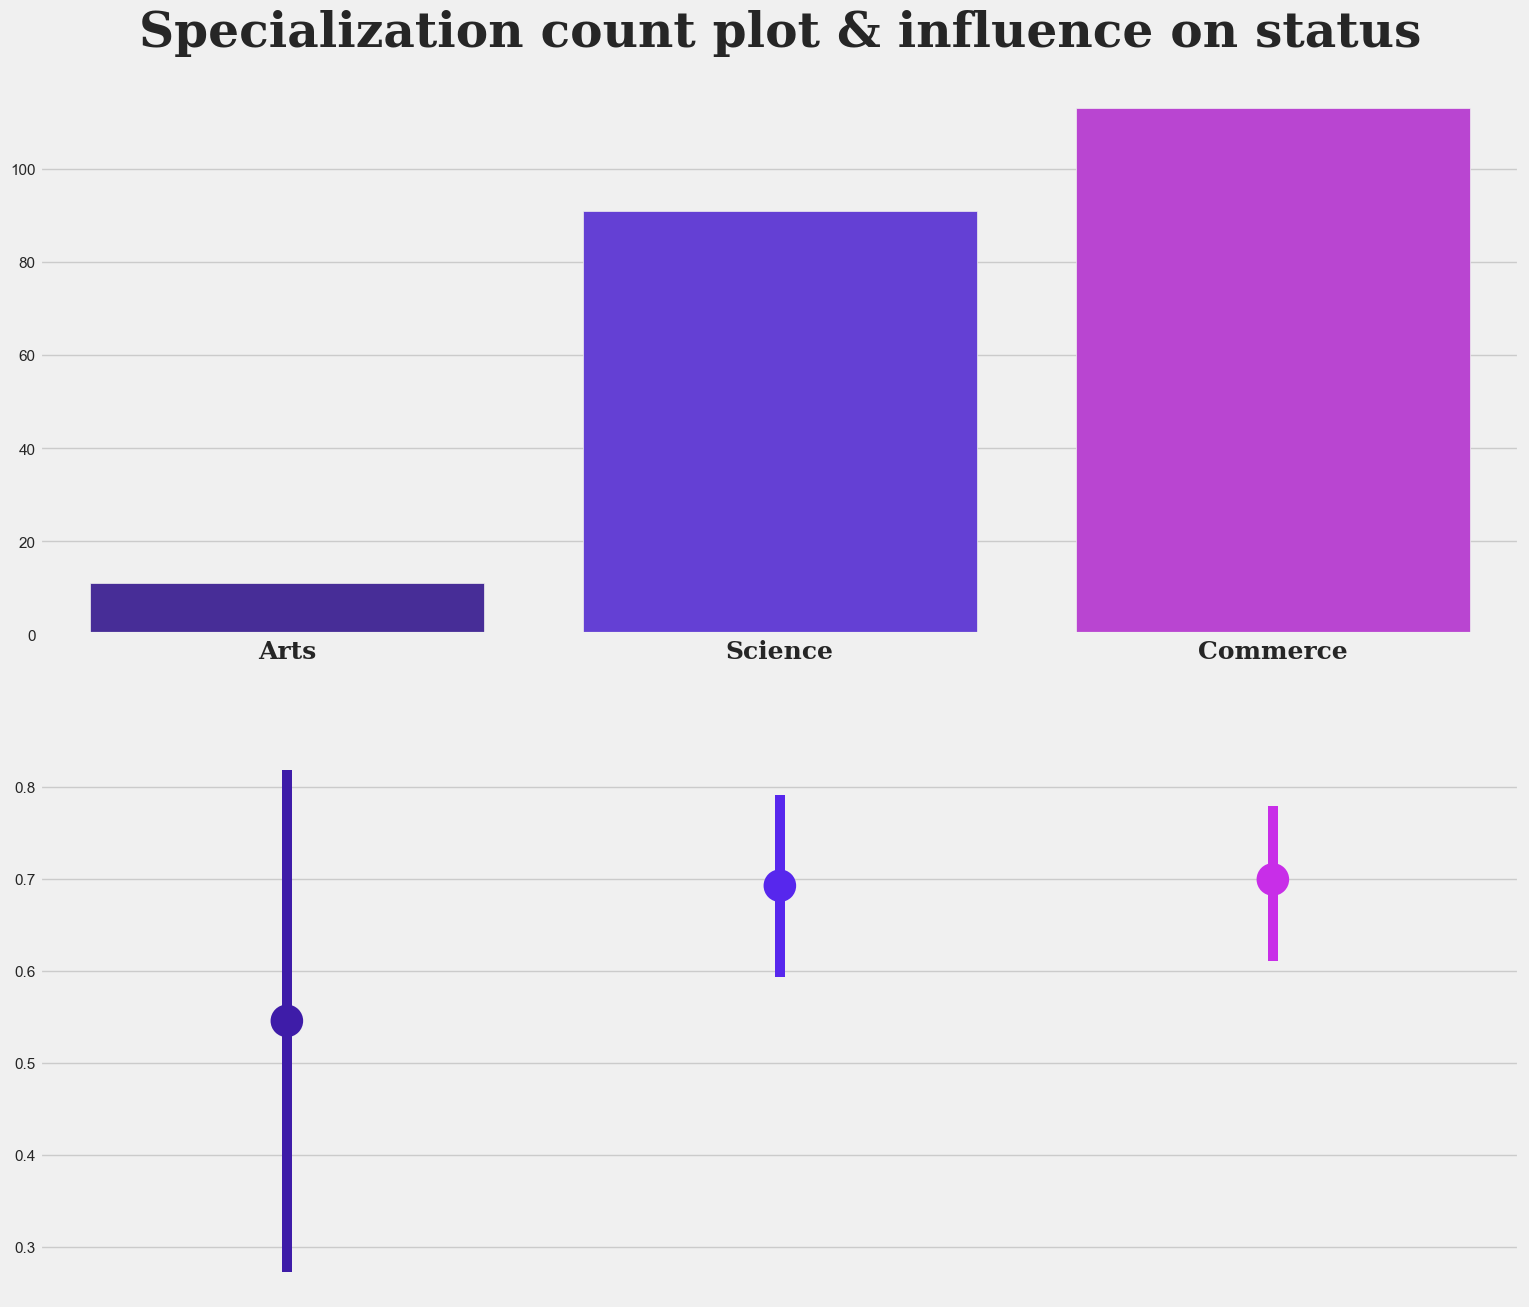

In [39]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
hsc_s_plot = sns.countplot(x=data.hsc_s, ax=ax1, palette=five_colors)
hsc_s_plot.set_title('Specialization count plot &'
                         ' influence on status',
                         fontsize=35, y=1.05, **hfont)
hsc_s_plot.set(xlabel=None,
                   ylabel=None)
hsc_s_plot.set_xticklabels(['Arts', 'Science', 'Commerce'],
                                size=18, **hfont)


ax2 = fig.add_subplot(grid[1, :])
hsc_s_cat = sns.pointplot(x=data.hsc_s, y='status', data=data,
             ax=ax2, palette=five_colors)
hsc_s_cat.set(xlabel=None,
                   ylabel=None)
hsc_s_cat.set_xticklabels([])

### **Conclusion:** 
#### People with a specialization in higher secondary education - art, have a lower chance of finding a work

## degree_p


---


Degree Percentage

Placed mean:       68.74054054054055
Not Placed mean:   61.13417910447762


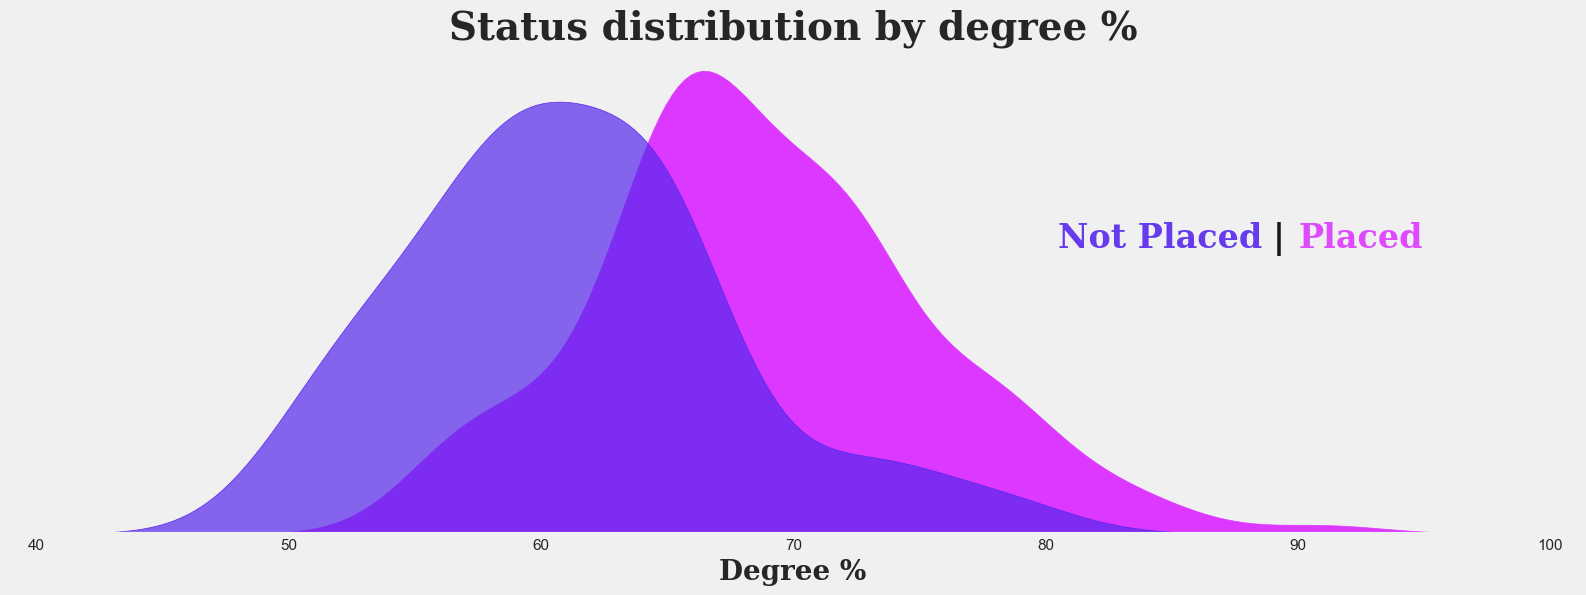

In [40]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title(f'Status distribution by degree %', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)

height = 0.04

ax.text(90, height, 'Placed', {'fontproperties': 'Serif',
                              'size': '24',
                              'weight': 'bold',
                              'color': two_colors[0]}, alpha=0.9)

ax.text(89, height, '|', {'fontproperties': 'Serif',
                         'size': '24',
                         'weight': 'bold',
                         'color': 'black'}, alpha=0.9)

ax.text(80.5, height, 'Not Placed', {'fontproperties': 'Serif',
                               'size': '24',
                               'weight': 'bold',
                               'color': two_colors[1]}, alpha=0.9)


sns.kdeplot(data.degree_p[data.status == 1], shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data.degree_p[data.status == 0], shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)

plt.xlabel('Degree %', size=20, **hfont)

print(f'Placed mean:       {data[data.status == 1]["degree_p"].mean()}')
print(f'Not Placed mean:   {data[data.status == 0]["degree_p"].mean()}')

In [41]:
placed_group = data[data.status == 1]['degree_p']
not_placed_group = data[data.status == 0]['degree_p']

t_test = stats.ttest_ind(placed_group, not_placed_group)
u_test = stats.mannwhitneyu(placed_group, not_placed_group)

In [42]:
print(f'Results of T-test                :   {t_test.pvalue}')
print(f'Results of U-test (Mann-whitneyu):   {u_test.pvalue}')

Results of T-test                :   8.807682138862608e-14
Results of U-test (Mann-whitneyu):   4.3024923797997455e-13


### **Conculsion:**

There is a statistical difference between groups divided by degree percentage

## degree_t


---


Under Graduation(Degree type)- Field of degree education

[Text(0, 0, 'Sci&Tech'), Text(1, 0, 'Comm&Mgmt'), Text(2, 0, 'Others')]

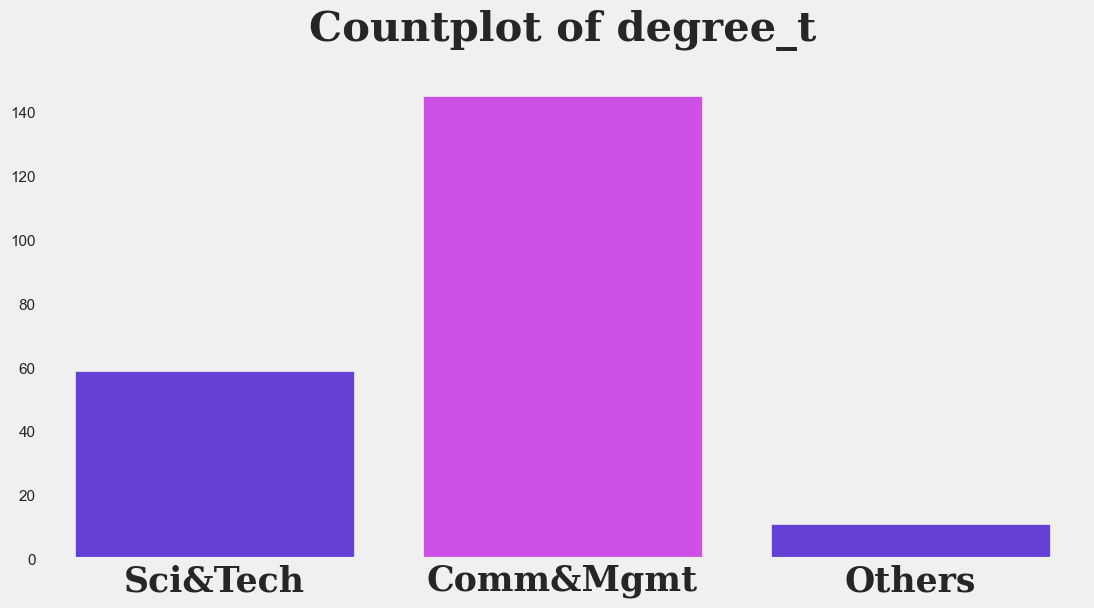

In [43]:
plt.figure(figsize=(12, 6))
degree_t_plot = sns.countplot(x=data.degree_t, palette=two_colors[::-1])
degree_t_plot.set_title('Countplot of degree_t',
                      fontsize=30, y=1.05, **hfont)
degree_t_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
degree_t_plot.set_xticklabels(data.degree_t.unique(), size=25, **hfont)

[Text(0, 0, 'Sci&Tech'), Text(1, 0, 'Comm&Mgmt'), Text(2, 0, 'Others')]

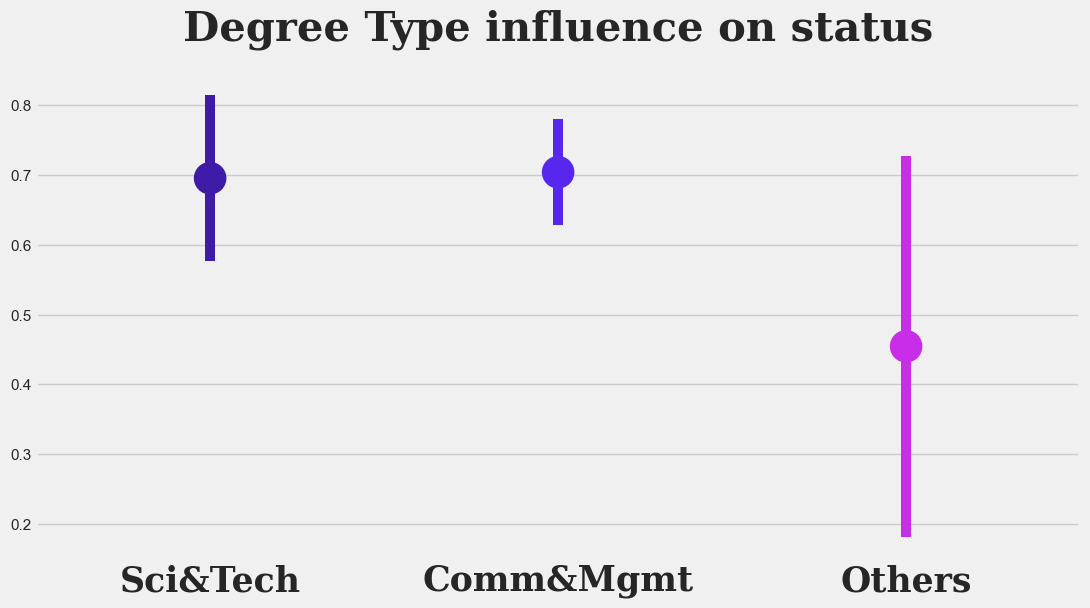

In [44]:
fig = plt.figure(figsize=(12, 6))

degree_type_plot = sns.pointplot(x=data.degree_t, y='status', data=data, palette=five_colors)

degree_type_plot.set_title('Degree Type influence on status', fontsize=30, y=1.05, **hfont)
degree_type_plot.set(xlabel=None,
                     ylabel=None)
degree_type_plot.set_xticklabels(data.degree_t.unique(), size=25, **hfont)

In [45]:
data.degree_t.unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

#### Encoding by degree of influence on status

In [46]:
data.degree_t = data.degree_t.map({'Sci&Tech': 1, 'Comm&Mgmt': 2, 'Others': 3}) 

## Workex


---


Work experience 

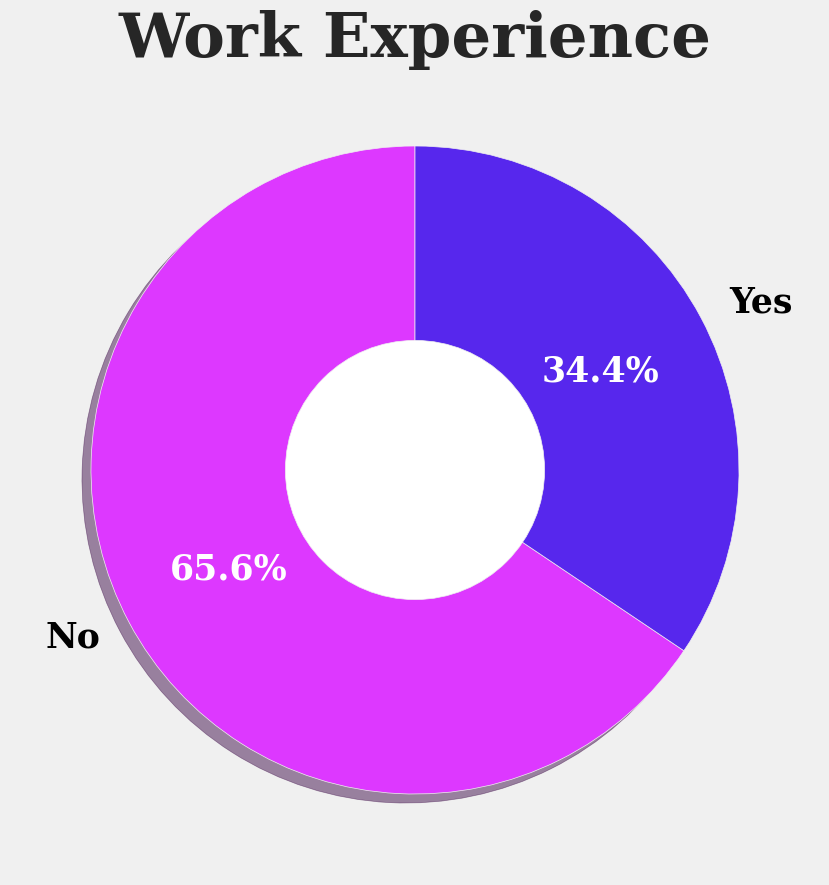

In [51]:
workex_data = data.workex.value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(workex_data,
                               labels=workex_data.index,
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Work Experience', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

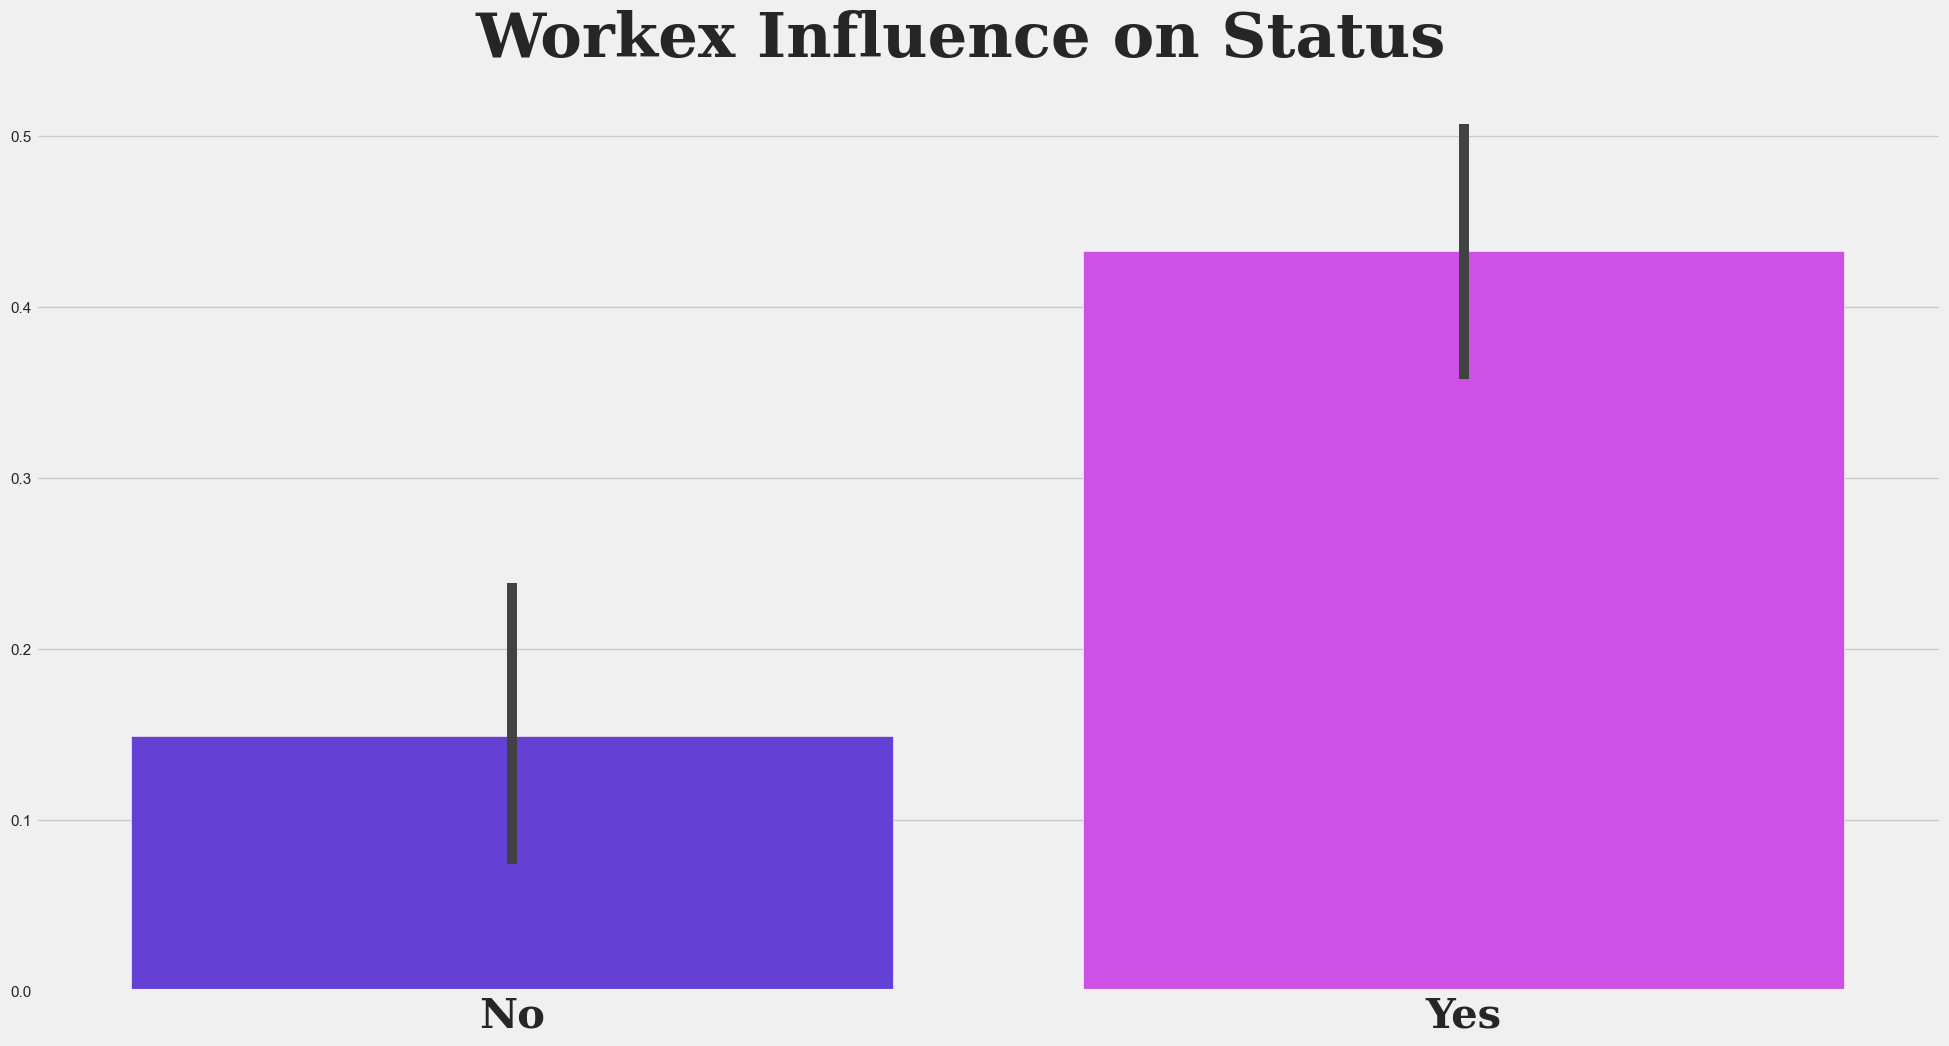

In [69]:
workex_plot = sns.catplot(x='status', y='workex', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
workex_plot.set_xticklabels(['No', 'Yes'], size=30, **hfont)
workex_plot.fig.suptitle('Workex Influence on Status', size=45, y=1.05, **hfont)
workex_plot.set(xlabel=None, ylabel=None)

In [57]:
data.workex = data.workex.map({'No': 0, 'Yes': 1})

Text(0.5, 0, 'test results')

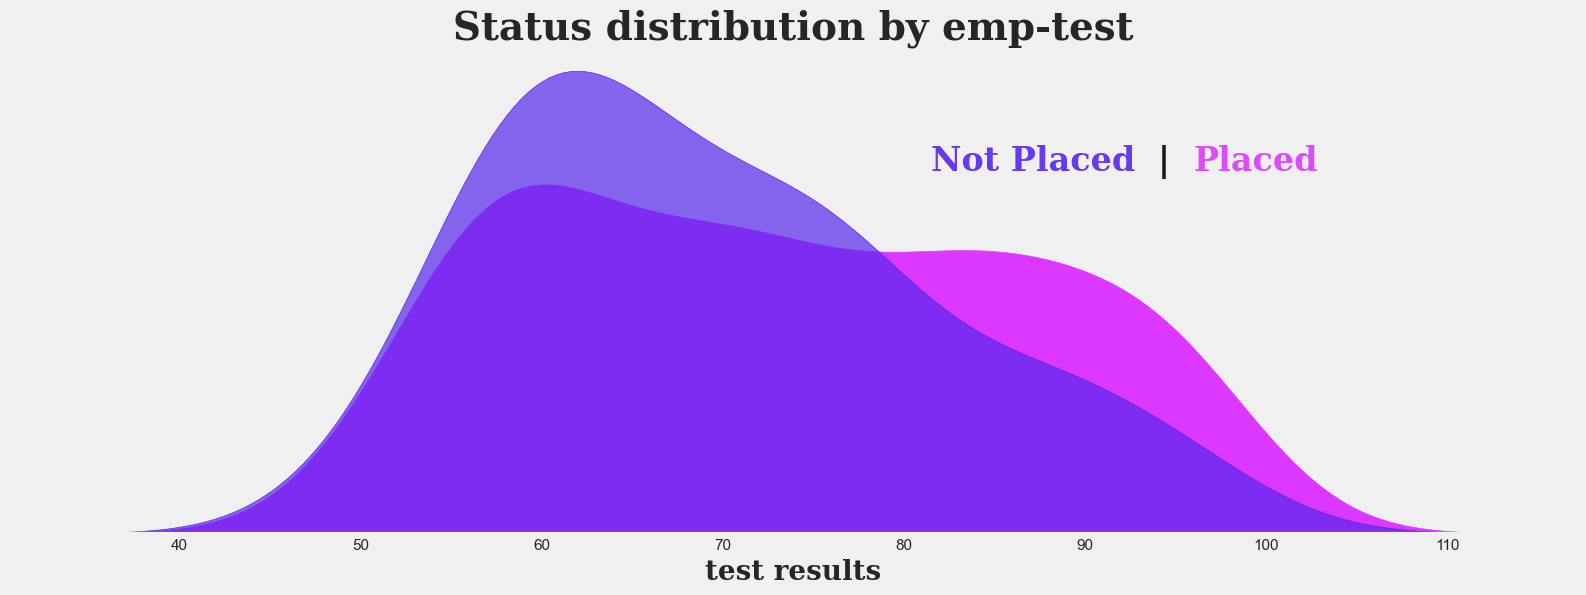

In [58]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title(f'Status distribution by emp-test', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)

height = 0.025

ax.text(96, height, 'Placed', {'fontproperties': 'Serif',
                               'size': '24',
                               'weight': 'bold',
                               'color': two_colors[0]}, alpha=0.9)

ax.text(94, height, '|', {'fontproperties': 'Serif',
                          'size': '24',
                          'weight': 'bold',
                          'color': 'black'}, alpha=0.9)

ax.text(81.5, height, 'Not Placed', {'fontproperties': 'Serif',
                                     'size': '24',
                                     'weight': 'bold',
                                     'color': two_colors[1]}, alpha=0.9)


sns.kdeplot(data.etest_p[data.status == 1], shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data.etest_p[data.status == 0], shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)

plt.xlabel('test results', size=20, **hfont)

In [59]:
data.status.value_counts()

1    148
0     67
Name: status, dtype: int64

In [60]:
placed_group = data[data.status == 1]['etest_p']
not_placed_group = data[data.status == 0]['etest_p']

placed_group_for_wil = np.random.choice(placed_group, len(not_placed_group))

t_test = stats.ttest_ind(placed_group, not_placed_group)
u_test = stats.mannwhitneyu(placed_group, not_placed_group)

# If variance is different for b/w the groups
wilcoxon = stats.wilcoxon(placed_group_for_wil, not_placed_group)

print(f'P-value (alpha = 0.05)')
print('-'*7)
print(f'T-test  : {t_test.pvalue:.5f}')
print(f'U-test  : {u_test.pvalue:.5f}')
print(f'Wilcoxon: {wilcoxon.pvalue:.5f}')

P-value (alpha = 0.05)
-------
T-test  : 0.06172
U-test  : 0.09555
Wilcoxon: 0.12900


[Text(0, 0, 'Mkt&HR'), Text(1, 0, 'Mkt&Fin')]

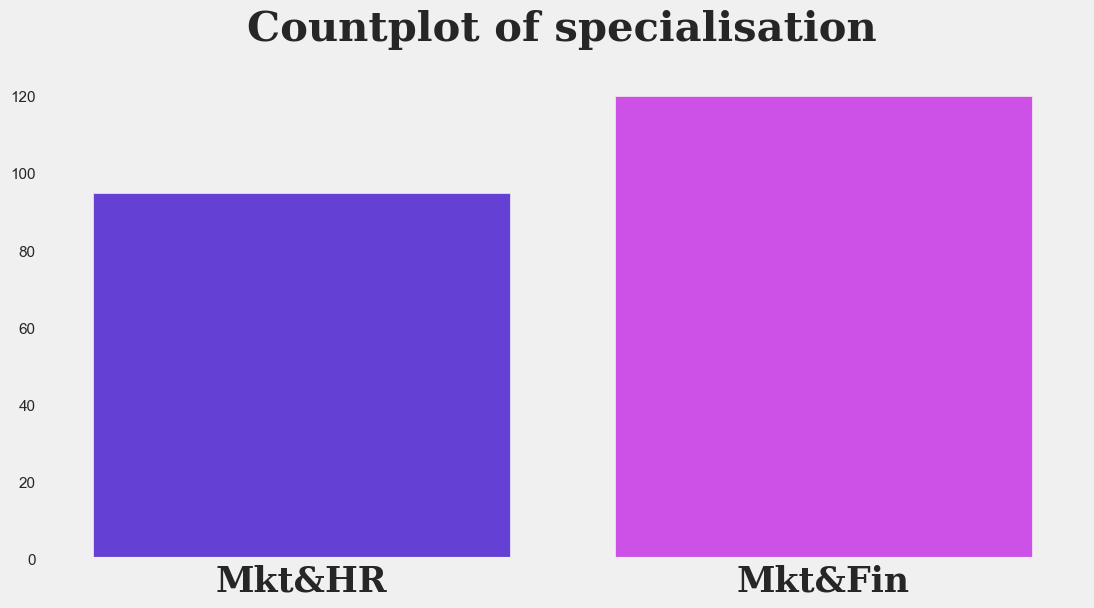

In [61]:
plt.figure(figsize=(12, 6))
specialisation_plot = sns.countplot(x=data.specialisation, palette=two_colors[::-1])
specialisation_plot.set_title('Countplot of specialisation',
                      fontsize=30, y=1.05, **hfont)
specialisation_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
specialisation_plot.set_xticklabels(data.specialisation.unique(), size=25, **hfont)

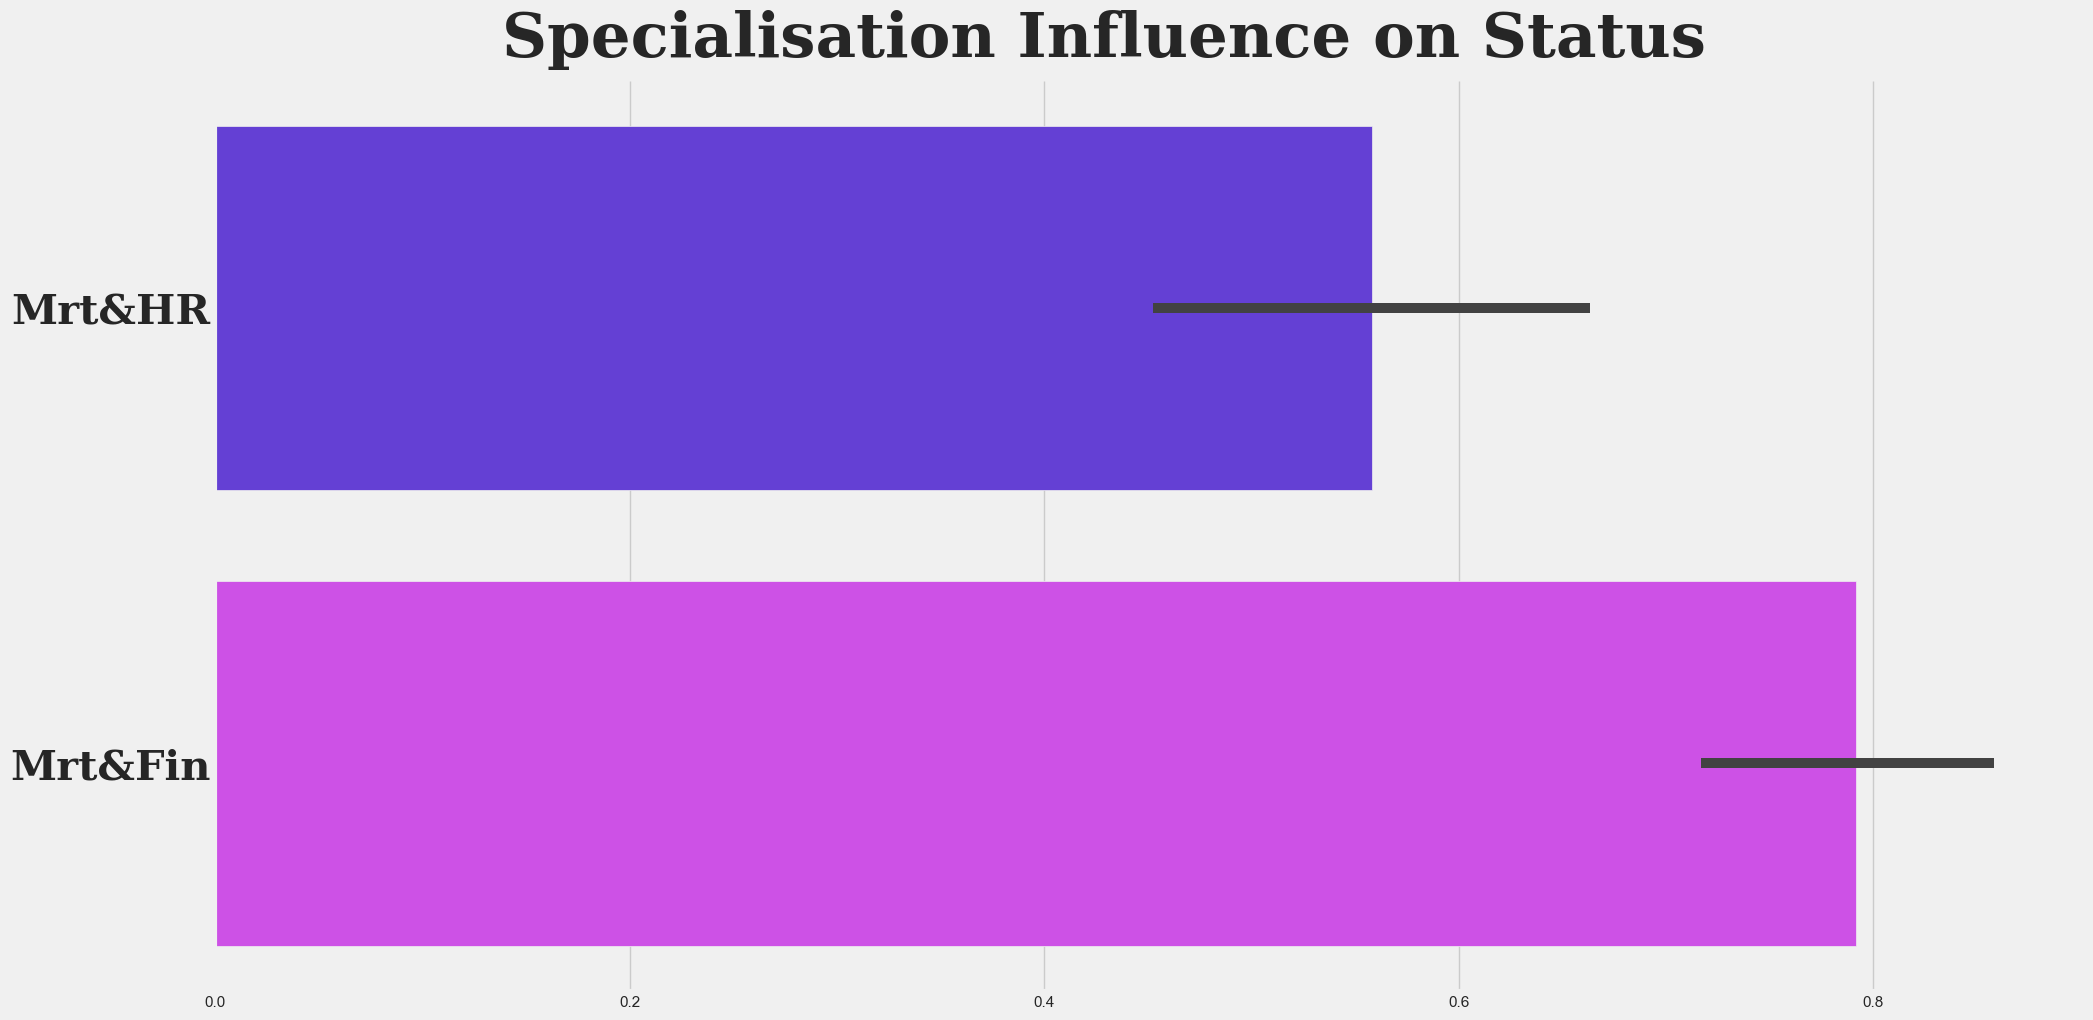

In [62]:
spec_catplot = sns.catplot(x='status', y='specialisation', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
spec_catplot.set_yticklabels(['Mrt&HR', 'Mrt&Fin'], size=30, **hfont)
spec_catplot.fig.suptitle('Specialisation Influence on Status', size=45, y=1.05, **hfont)
spec_catplot.set(xlabel=None, ylabel=None)

In [63]:
data.specialisation = data.specialisation.map({'Mkt&Fin': 1, 'Mkt&HR': 0})

Text(0.5, 0, 'MBA %')

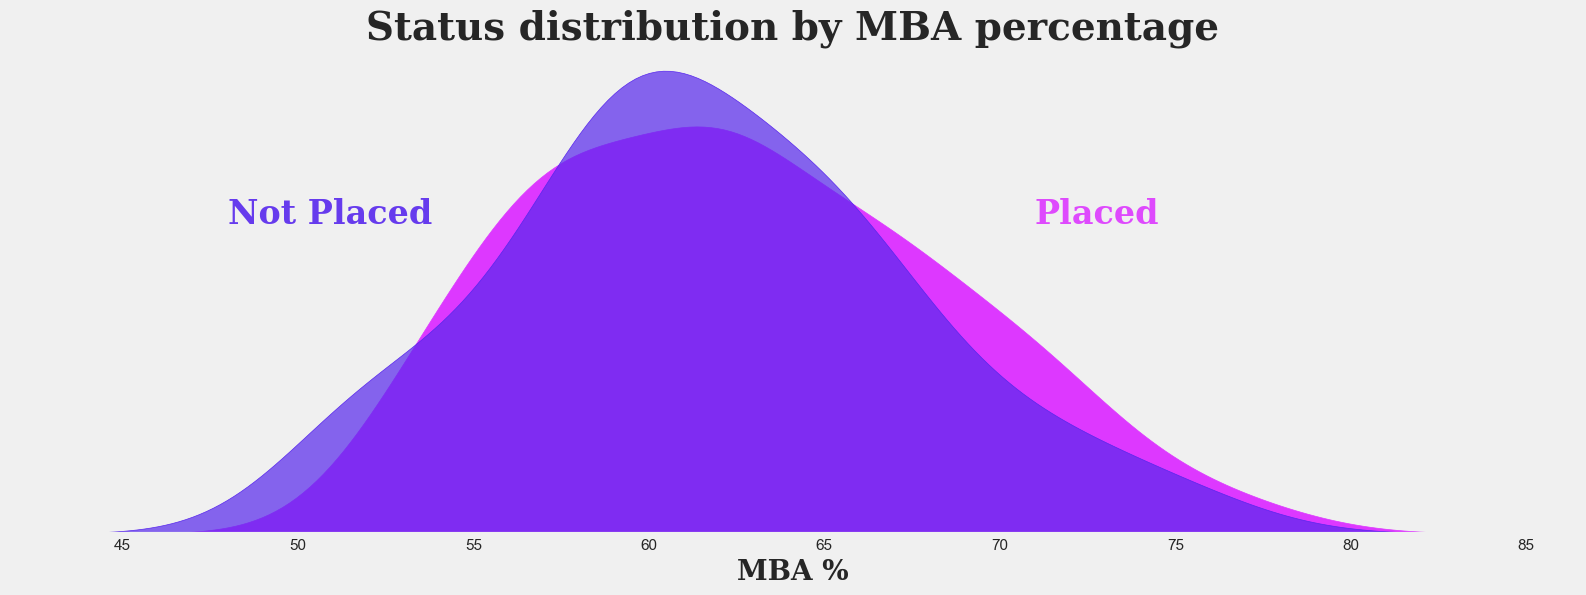

In [64]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title(f'Status distribution by MBA percentage', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)

height = 0.045

ax.text(71, height, 'Placed', {'fontproperties': 'Serif',
                               'size': '24',
                               'weight': 'bold',
                               'color': two_colors[0]}, alpha=0.9)

ax.text(48, height, 'Not Placed', {'fontproperties': 'Serif',
                                     'size': '24',
                                     'weight': 'bold',
                                     'color': two_colors[1]}, alpha=0.9)


sns.kdeplot(data.mba_p[data.status == 1], shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data.mba_p[data.status == 0], shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)

plt.xlabel('MBA %', size=20, **hfont)

In [65]:
placed_group = data[data.status == 1]['mba_p']
not_placed_group = data[data.status == 0]['mba_p']

placed_group_for_wil = np.random.choice(placed_group, len(not_placed_group))

t_test = stats.ttest_ind(placed_group, not_placed_group)
u_test = stats.mannwhitneyu(placed_group, not_placed_group)

print(f'P-value (alpha = 0.05)')
print('-'*7)
print(f'T-test  : {t_test.pvalue:.5f}')
print(f'U-test  : {u_test.pvalue:.5f}')

P-value (alpha = 0.05)
-------
T-test  : 0.26145
U-test  : 0.35471


<AxesSubplot:>

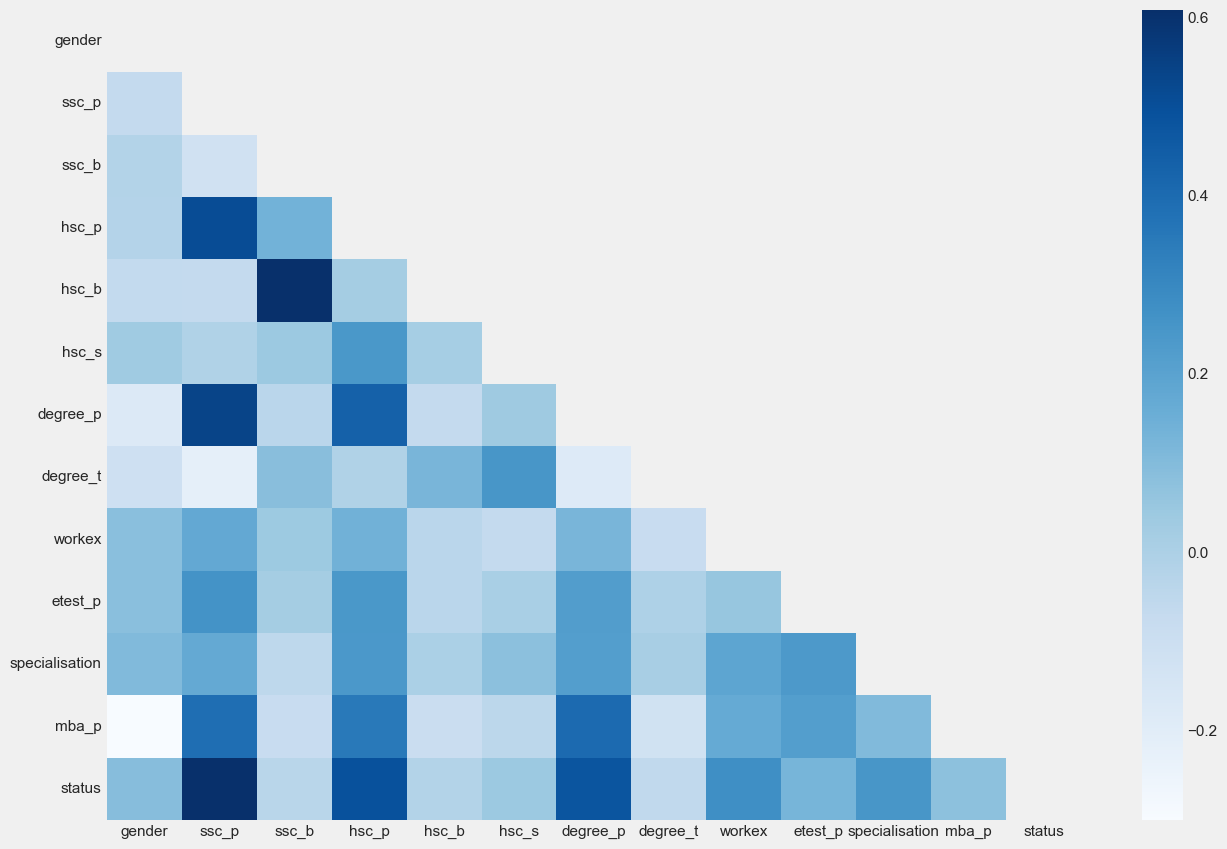

In [68]:
plt.figure(figsize=(14, 10))

corr_mask = np.triu(data.corr())
h_map = sns.heatmap(data.corr(), mask=corr_mask, cmap='Blues')
h_map